## Maschinelles Lernen SS 2021

### Praktikum 2

Einfache Segmentierung von Bildern


In [245]:
import numpy as np


In [246]:
import cv2 as cv
import glob


In [247]:
import os


In [248]:
import matplotlib.pyplot as plt


In [249]:
# Set path to protein images - Please change the path to the location of images on your system
path = "images/"


In [250]:
# Get all image names
imageNames = []
# Format is ['20_B5_1_green.jpg', ...]
[imageNames.append(filename) for filename in glob.glob(path + "*.jpg")]

print(imageNames)


['images\\20_B5_1_green.jpg', 'images\\20_B5_2_green.jpg', 'images\\21_B5_1_green.jpg', 'images\\21_B5_2_green.jpg', 'images\\22_B5_1_green.jpg', 'images\\22_B5_2_green.jpg', 'images\\504_A4_1_green.jpg', 'images\\504_A4_3_green.jpg', 'images\\506_A4_2_green.jpg', 'images\\506_A4_3_green.jpg', 'images\\555_A4_1_green.jpg', 'images\\555_A4_2_green.jpg']


In [251]:
print(imageNames[0])


images\20_B5_1_green.jpg


In [252]:
# Print all the image names
print(imageNames)


['images\\20_B5_1_green.jpg', 'images\\20_B5_2_green.jpg', 'images\\21_B5_1_green.jpg', 'images\\21_B5_2_green.jpg', 'images\\22_B5_1_green.jpg', 'images\\22_B5_2_green.jpg', 'images\\504_A4_1_green.jpg', 'images\\504_A4_3_green.jpg', 'images\\506_A4_2_green.jpg', 'images\\506_A4_3_green.jpg', 'images\\555_A4_1_green.jpg', 'images\\555_A4_2_green.jpg']


In [253]:
# Create subfolders for images of type A and of type B
if not os.path.exists(path + "saved_images/"):
    os.mkdir(path + "saved_images/")


In [254]:
if not os.path.exists(path + "saved_images/A"):
    os.mkdir(path + "saved_images/A")


In [255]:
if not os.path.exists(path + "saved_images/B"):
    os.mkdir(path + "saved_images/B")


In [256]:
# For a single image
imageName = imageNames[0]


In [257]:
# Read image
imageProt = cv.imread(imageName)
cv.destroyAllWindows()


In [258]:
imageProt.size


8957952

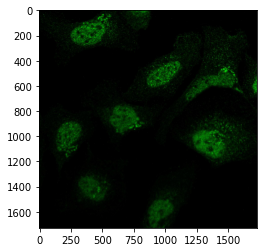

In [259]:
# Show image
plt.imshow(imageProt)


In [260]:
# Convert to grayscale
imageProtGray = cv.cvtColor(imageProt, cv.COLOR_BGR2GRAY)


In [261]:
# Treshold image to binary
tresholdValue = 1.5 * np.mean(imageProtGray)
ret, grayTresh = cv.threshold(imageProtGray, tresholdValue, 255, cv.THRESH_BINARY)


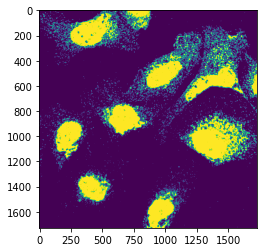

In [262]:
# Show thresholded image
plt.imshow(grayTresh)


In [263]:
if not os.path.exists(path + "output/"):
    os.mkdir(path + "output/")
cv.imwrite(path + "output/test.jpg", grayTresh)


True

In [264]:
## Segment image
filterSize = 3
kernel = np.ones((filterSize, filterSize), np.uint8)
# Operate closing to fill holes
grayTreshMorph = grayTresh
grayTreshMorph = cv.morphologyEx(grayTresh, cv.MORPH_CLOSE, kernel)

# Get contours
contours, hierarchy = cv.findContours(
    grayTreshMorph, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE
)
# Get largest contours
proteinContours = []
# Loop over all contours
for cnt in contours:
    area = cv.contourArea(cnt)
    # Discard small contours
    if area < 10000:
        continue
    # Add contour
    proteinContours.append(cnt)

# Display number of protein contours found
print("Number of protein contours found = " + str(len(proteinContours)))


Number of protein contours found = 10


In [265]:
print(contours[3])


[[[ 826 1714]]

 [[ 829 1714]]]


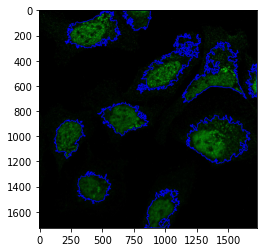

In [266]:
# show image with detected contours
imageWithContours = cv.drawContours(imageProt, proteinContours, -1, (0, 0, 255), 3)
plt.imshow(imageWithContours)


In [267]:
imageNameFile = imageName.split("\\")[-1]


In [268]:
print(imageNameFile)


20_B5_1_green.jpg


In [269]:
# Loop over all protein contours to save each protein in 500x500 image
imageProtProteinContours = imageProt.copy()
proteinNr = 0
for c in proteinContours:
    proteinNr += 1
    # Get center of contour
    M = cv.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Add black border to image
    padding = 250
    # Crop image for each protein found: 500x500x3 jpg
    imageProtPadded = cv.copyMakeBorder(
        imageProt,
        padding,
        padding,
        padding,
        padding,
        cv.BORDER_CONSTANT,
        value=[0, 0, 0],
    )

    # Crop image
    imgSize = 500
    croppedImg = imageProtPadded[
        cY - int(imgSize / 2) + padding : cY + int(imgSize / 2) + padding,
        cX - int(imgSize / 2) + padding : cX + int(imgSize / 2) + padding,
    ]

    # Save cropped protein images
    if imageName[-14] == "A":
        print(
            "Writing "
            + path
            + "saved_images/A/"
            + "prot"
            + str(proteinNr)
            + "_"
            + imageNameFile
        )
        print(
            cv.imwrite(
                path
                + "saved_images/A/"
                + "prot"
                + str(proteinNr)
                + "_"
                + imageNameFile,
                croppedImg,
            )
        )
    elif imageName[-14] == "B":
        print(
            "Writing "
            + path
            + "saved_images/B/"
            + "prot"
            + str(proteinNr)
            + "_"
            + imageNameFile
        )
        print(
            cv.imwrite(
                path
                + "saved_images/B/"
                + "prot"
                + str(proteinNr)
                + "_"
                + imageNameFile,
                croppedImg,
            )
        )
    else:
        print("Could not determine class for image ", imageNameFile)
        continue


Writing images/saved_images/B/prot1_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot2_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot3_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot4_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot5_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot6_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot7_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot8_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot9_20_B5_1_green.jpg
True
Writing images/saved_images/B/prot10_20_B5_1_green.jpg
True


In [270]:
# Loop over all images and segment proteins: please extend
for imageName in imageNames:
   

IndentationError: expected an indented block after 'for' statement on line 2 (3845619326.py, line 3)